In [1]:
# Renewable Energy Suitability Analysis - EDA Notebook
# Dataset: City-level renewable energy potential and infrastructure analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("📊 Renewable Energy Suitability Dataset - Exploratory Data Analysis")


📊 Renewable Energy Suitability Dataset - Exploratory Data Analysis


In [4]:
# Load the dataset
df = pd.read_csv('..//data//City_Optimized.csv')

print("🔍 DATASET OVERVIEW")
print("="*50)
print(f"Dataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Columns: {len(df.columns)}")

🔍 DATASET OVERVIEW
Dataset Shape: (2000, 56)
Memory Usage: 1.33 MB
Columns: 56


In [5]:
# Display basic information
print("\n📋 COLUMN INFORMATION")
print("="*50)
df.info()

print("\n🏙️ SAMPLE RECORDS")
print("="*50)
df.head(3)


📋 COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   city_id                             2000 non-null   object 
 1   city                                2000 non-null   object 
 2   country                             2000 non-null   object 
 3   latitude                            2000 non-null   float64
 4   longitude                           2000 non-null   float64
 5   continent                           2000 non-null   object 
 6   solar_irradiance_avg                2000 non-null   float64
 7   peak_sun_hours                      2000 non-null   float64
 8   avg_wind_speed                      2000 non-null   float64
 9   wind_power_density                  2000 non-null   int64  
 10  annual_rainfall                     2000 non-null   float64
 11  river_proximity_score

,city_id,city,country,latitude,longitude,continent,solar_irradiance_avg,peak_sun_hours,avg_wind_speed,wind_power_density,annual_rainfall,river_proximity_score,hydropower_potential,avg_temperature,temperature_range,avg_humidity,cloud_cover_percentage,geothermal_gradient,population,population_density,gdp_per_capita,cost_of_living_index,avg_household_income,tax_revenue_per_capita,unemployment_rate,education_index,electricity_consumption_per_capita,total_electricity_consumption,grid_infrastructure_quality,current_renewable_percentage,fossil_fuel_dependency,energy_storage_capacity,grid_reliability_score,available_land_area,renewable_investment,govt_renewable_subsidy,rd_spending,transmission_infrastructure,carbon_emissions_per_capita,air_quality_index,environmental_policy_strength,renewable_target_2030,biomass_availability,urban_density_score,skilled_workforce_percentage,technology_adoption_rate,installation_cost_index,maintenance_cost_index,political_stability,permitting_efficiency,optimal_renewable_energy,solar_suitability_score,wind_suitability_score,hydro_suitability_score,geothermal_suitability_score,biomass_suitability_score
0,CITY_0001,Tokyo,Japan,35.6762,139.6503,Asia,2.762286,2.220815,1.912033,10,729.890813,0.56,140.387522,10.401850,17.117090,56.606819,41.37,20.000000,50000,4852,5000,69.27,6638,1063,5.59,0.49,4,179,3.988502,36.57,59.944700,10,37.17,180.603682,1,2,1,4.065694,0,98,6.307809,73.722008,24068,4.64,29.30,5.22,116.41,109.25,4.973797,5.127967,Biomass,70.95,25.37,46.86,38.41,100.00
1,CITY_0002,Delhi,India,28.6139,77.2090,Asia,3.639112,2.957221,4.907146,43,1278.893128,0.37,94.182268,7.116278,17.203992,77.483733,28.35,20.000000,1654212,1876,29979,90.23,36453,6616,2.58,0.67,6,9395,5.553169,42.24,55.196777,1084,53.15,6.094597,1438,423,746,5.183656,5,119,3.874623,75.470239,1250,5.03,38.19,5.74,93.74,114.61,6.008678,5.946304,Biomass,92.65,42.90,48.90,44.14,43.83
2,CITY_0003,Shanghai,China,31.2304,121.4737,Asia,3.731677,2.633233,3.130820,11,1529.254425,0.28,120.429472,8.148330,21.767677,87.257812,27.38,32.299212,438071,148,30033,126.65,55498,5642,8.02,0.71,4,1635,5.482001,45.95,45.547692,53,50.07,5.000000,114,210,56,4.762624,5,91,4.999352,72.733798,1000,3.26,41.83,4.04,103.68,112.33,5.499178,7.829357,Hydropower,91.13,30.46,51.91,50.37,47.73


In [6]:
# Data Quality Assessment
print("\n🔎 DATA QUALITY ASSESSMENT")
print("="*50)

# Missing values analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

# Data types
print(f"\nData Types Distribution:")
print(df.dtypes.value_counts())

# Duplicate analysis
print(f"\nDuplicate Records: {df.duplicated().sum()}")


🔎 DATA QUALITY ASSESSMENT
Missing Values Summary:
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []

Data Types Distribution:
float64    36
int64      15
object      5
Name: count, dtype: int64

Duplicate Records: 0


In [7]:
# Statistical Summary
print("\n📊 STATISTICAL SUMMARY")
print("="*50)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

# Display statistical summary for key variables
key_stats = df[numerical_cols].describe()
print("\nKey Statistical Measures:")
key_stats.round(2)


📊 STATISTICAL SUMMARY
Numerical columns: 51
Categorical columns: 5

Key Statistical Measures:


,latitude,longitude,solar_irradiance_avg,peak_sun_hours,avg_wind_speed,wind_power_density,annual_rainfall,river_proximity_score,hydropower_potential,avg_temperature,temperature_range,avg_humidity,cloud_cover_percentage,geothermal_gradient,population,population_density,gdp_per_capita,cost_of_living_index,avg_household_income,tax_revenue_per_capita,unemployment_rate,education_index,electricity_consumption_per_capita,total_electricity_consumption,grid_infrastructure_quality,current_renewable_percentage,fossil_fuel_dependency,energy_storage_capacity,grid_reliability_score,available_land_area,renewable_investment,govt_renewable_subsidy,rd_spending,transmission_infrastructure,carbon_emissions_per_capita,air_quality_index,environmental_policy_strength,renewable_target_2030,biomass_availability,urban_density_score,skilled_workforce_percentage,technology_adoption_rate,installation_cost_index,maintenance_cost_index,political_stability,permitting_efficiency,solar_suitability_score,wind_suitability_score,hydro_suitability_score,geothermal_suitability_score,biomass_suitability_score
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,17.69,8.90,3.99,3.39,5.14,101.20,1214.90,0.28,91.48,10.05,19.06,71.58,34.40,34.91,867766.68,2591.24,30267.41,85.55,55942.25,7568.25,4.12,0.65,5.43,4659.59,5.53,28.30,66.64,370.78,50.19,59.38,627.92,383.29,327.95,5.52,5.24,90.37,4.83,60.87,8962.29,3.56,45.65,4.53,116.52,112.04,6.18,7.07,91.89,47.96,44.97,53.47,66.64
std,28.78,81.99,0.93,0.82,2.78,150.75,464.70,0.16,86.28,8.23,5.58,10.91,10.53,19.60,1388160.14,4185.92,25215.83,19.43,48807.63,6632.52,2.80,0.14,2.29,7842.34,1.56,15.74,15.97,732.00,14.21,137.73,1246.36,827.81,764.60,1.64,3.57,21.27,2.01,17.62,21659.35,1.09,9.84,1.61,15.26,10.88,1.74,1.31,10.35,22.26,14.18,16.87,24.09
min,-43.16,-124.76,2.00,2.00,1.50,10.00,200.00,0.00,1.20,-5.00,5.00,35.00,15.00,20.00,50000.00,100.00,5000.00,40.00,6070.00,765.00,1.50,0.30,1.00,60.00,2.00,2.00,20.00,0.00,30.00,5.00,1.00,2.00,0.00,2.00,0.00,25.00,1.00,30.00,1000.00,2.00,16.65,1.00,67.40,68.42,2.00,2.98,56.54,14.85,13.73,25.72,27.46
25%,-2.11,-70.62,3.30,2.77,2.97,10.00,881.50,0.16,31.85,3.83,15.18,63.94,27.10,20.00,187957.00,382.50,13270.75,72.23,23575.25,3140.00,1.90,0.54,4.00,893.25,4.46,15.85,55.95,56.00,39.39,7.05,62.00,45.00,31.00,4.37,3.00,76.00,3.39,48.00,1002.25,2.69,38.91,3.43,106.27,104.77,5.05,6.16,85.38,31.06,34.88,41.39,45.18
50%,24.43,9.85,3.97,3.38,4.55,35.00,1169.87,0.26,63.58,9.17,19.13,71.62,34.16,27.76,436034.00,1066.00,22240.50,84.22,40625.00,5547.50,3.32,0.63,5.00,2147.50,5.35,26.34,68.59,148.00,48.64,20.27,194.50,128.50,92.00,5.31,5.00,90.00,4.64,59.10,2632.00,3.48,45.68,4.31,116.72,111.81,6.08,7.08,97.40,42.47,42.97,48.40,58.08
75%,40.51,78.19,4.66,3.98,6.78,114.25,1525.13,0.38,123.04,16.44,23.13,79.46,41.50,37.87,964656.50,2819.50,38631.00,97.59,70828.00,9760.50,5.35,0.73,6.00,5310.00,6.37,38.68,79.07,375.25,58.57,54.87,568.75,363.25,290.00,6.54,7.00,105.00,6.05,73.04,7966.25,4.31,52.19,5.38,126.32,119.80,7.32,7.94,100.00,59.29,52.47,59.63,100.00
max,61.79,176.70,6.58,6.06,12.00,635.00,2698.90,0.80,604.94,30.50,35.19,95.00,69.29,100.00,19133222.00,25000.00,120000.00,150.00,298876.00,41211.00,19.17,0.95,15.00,128922.00,10.00,75.00,95.00,12148.00,98.00,2000.00,16933.00,14140.00,12027.00,10.00,21.00,166.00,10.00,100.00,500000.00,7.79,75.38,10.00,176.26,147.46,10.00,10.00,100.00,100.00,100.00,100.00,100.00


In [ ]:
# Geographic Distribution Analysis
print("\n🌍 GEOGRAPHIC DISTRIBUTION")
print("="*50)

# Continent distribution
continent_dist = df['continent'].value_counts()
print("Cities by Continent:")
print(continent_dist)

# Country distribution
print(f"\nNumber of countries: {df['country'].nunique()}")
print("\nTop 10 countries by city count:")
print(df['country'].value_counts().head(10))


🌍 GEOGRAPHIC DISTRIBUTION
Cities by Continent:
continent
Asia             420
Europe           420
North America    400
South America    300
Africa           300
Oceania          160
Name: count, dtype: int64

Number of countries: 60

Top 10 countries by city count:
country
USA          280
India        126
Australia    120
Brazil        80
China         63
Canada        60
Mexico        60
Japan         42
Spain         42
Colombia      40
Name: count, dtype: int64


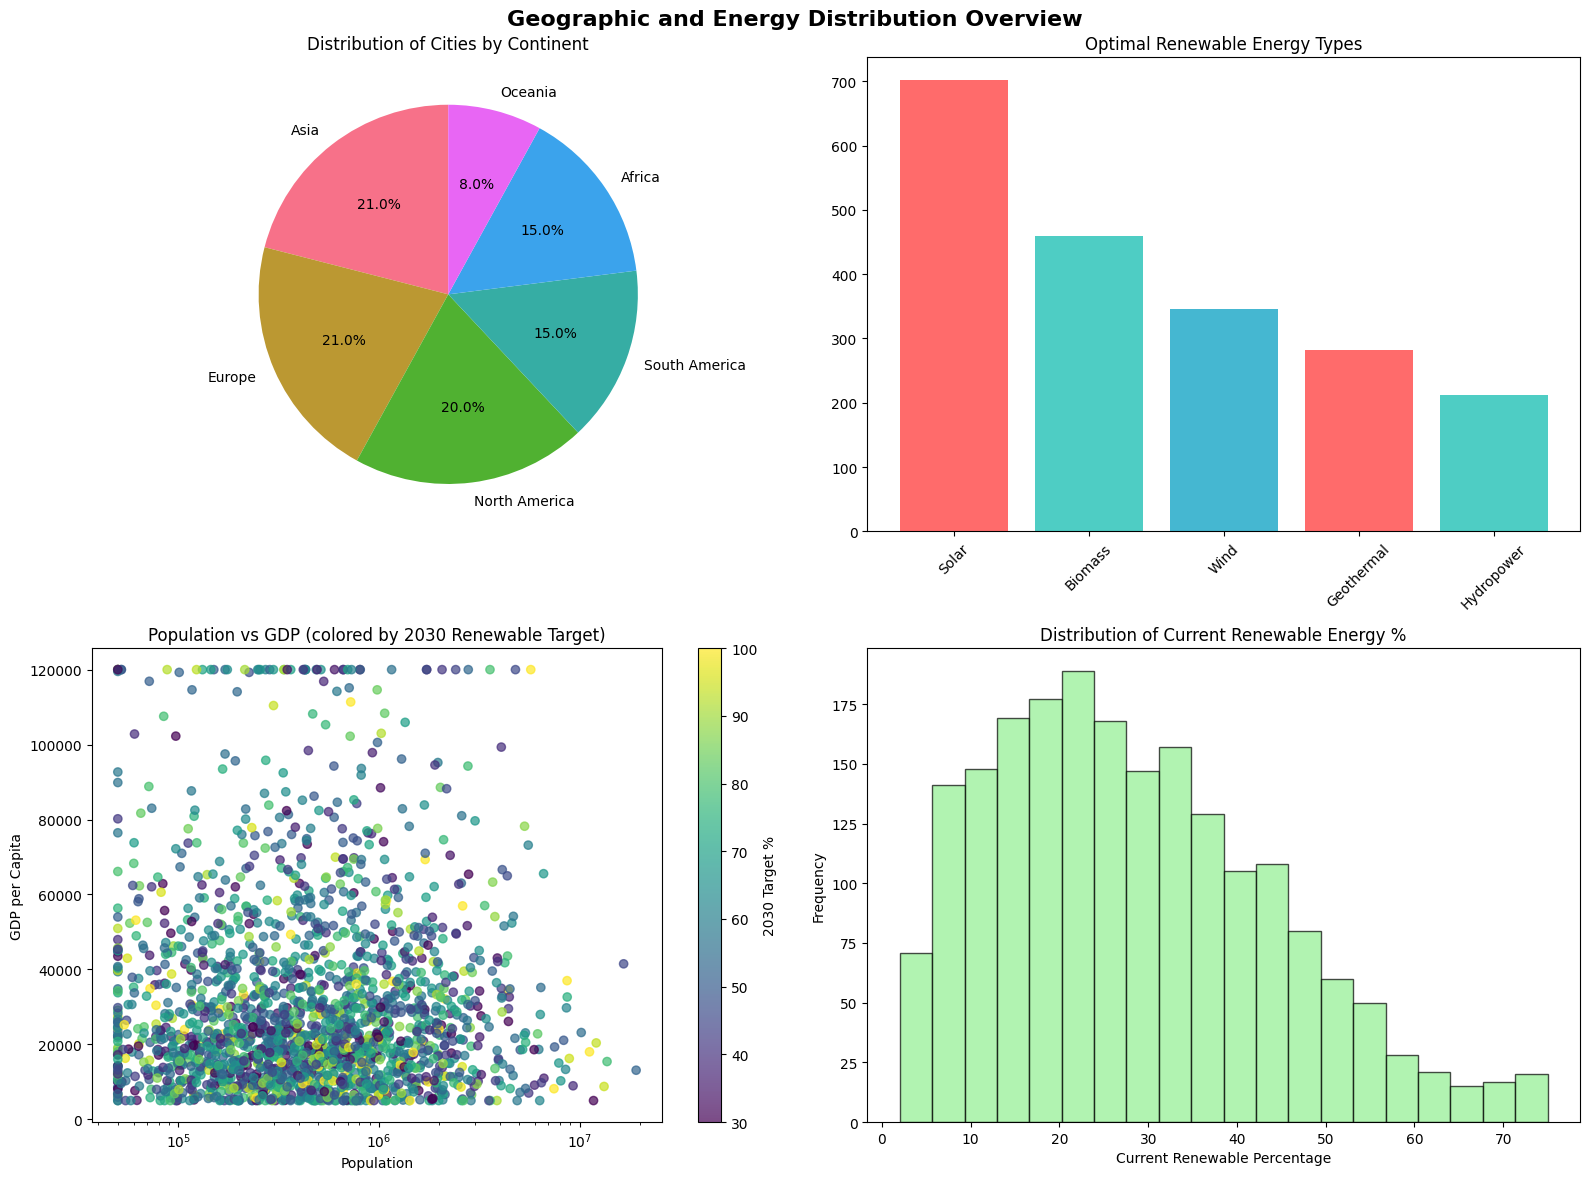

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Geographic and Energy Distribution Overview', fontsize=16, fontweight='bold')

# 1. Continental distribution
continent_counts = df['continent'].value_counts()
axes[0,0].pie(continent_counts.values, labels=continent_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribution of Cities by Continent')

# 2. Optimal renewable energy distribution
energy_dist = df['optimal_renewable_energy'].value_counts()
axes[0,1].bar(energy_dist.index, energy_dist.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0,1].set_title('Optimal Renewable Energy Types')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Population vs GDP scatter
scatter = axes[1,0].scatter(df['population'], df['gdp_per_capita'],
                           c=df['renewable_target_2030'], cmap='viridis', alpha=0.7)
axes[1,0].set_xlabel('Population')
axes[1,0].set_ylabel('GDP per Capita')
axes[1,0].set_title('Population vs GDP (colored by 2030 Renewable Target)')
axes[1,0].set_xscale('log')
plt.colorbar(scatter, ax=axes[1,0], label='2030 Target %')

# 4. Current renewable percentage distribution
axes[1,1].hist(df['current_renewable_percentage'], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1,1].set_xlabel('Current Renewable Percentage')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Distribution of Current Renewable Energy %')

plt.tight_layout()
plt.show()

In [9]:
# Energy Potential Analysis
print("\nRENEWABLE ENERGY POTENTIAL ANALYSIS")
print("="*50)

# Solar energy analysis
solar_stats = {
    'Mean Solar Irradiance': df['solar_irradiance_avg'].mean(),
    'Mean Peak Sun Hours': df['peak_sun_hours'].mean(),
    'Solar Suitability Score': df['solar_suitability_score'].mean()
}

print("Solar Energy Potential:")
for key, value in solar_stats.items():
    print(f"  {key}: {value:.2f}")

# Wind energy analysis
wind_stats = {
    'Mean Wind Speed': df['avg_wind_speed'].mean(),
    'Mean Wind Power Density': df['wind_power_density'].mean(),
    'Wind Suitability Score': df['wind_suitability_score'].mean()
}

print("\nWind Energy Potential:")
for key, value in wind_stats.items():
    print(f"  {key}: {value:.2f}")

# Hydro and other renewables
other_renewables = {
    'Hydro Suitability Score': df['hydro_suitability_score'].mean(),
    'Geothermal Suitability Score': df['geothermal_suitability_score'].mean(),
    'Biomass Suitability Score': df['biomass_suitability_score'].mean()
}

print("\nOther Renewable Potentials:")
for key, value in other_renewables.items():
    print(f"  {key}: {value:.2f}")


RENEWABLE ENERGY POTENTIAL ANALYSIS
Solar Energy Potential:
  Mean Solar Irradiance: 3.99
  Mean Peak Sun Hours: 3.39
  Solar Suitability Score: 91.89

Wind Energy Potential:
  Mean Wind Speed: 5.14
  Mean Wind Power Density: 101.20
  Wind Suitability Score: 47.96

Other Renewable Potentials:
  Hydro Suitability Score: 44.97
  Geothermal Suitability Score: 53.47
  Biomass Suitability Score: 66.64


Biomass      : 459 cities
Hydropower   : 212 cities
Solar        : 702 cities
Wind         : 345 cities
Geothermal   : 282 cities


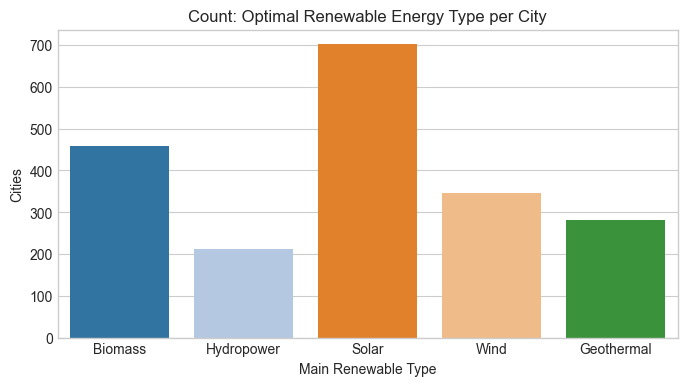

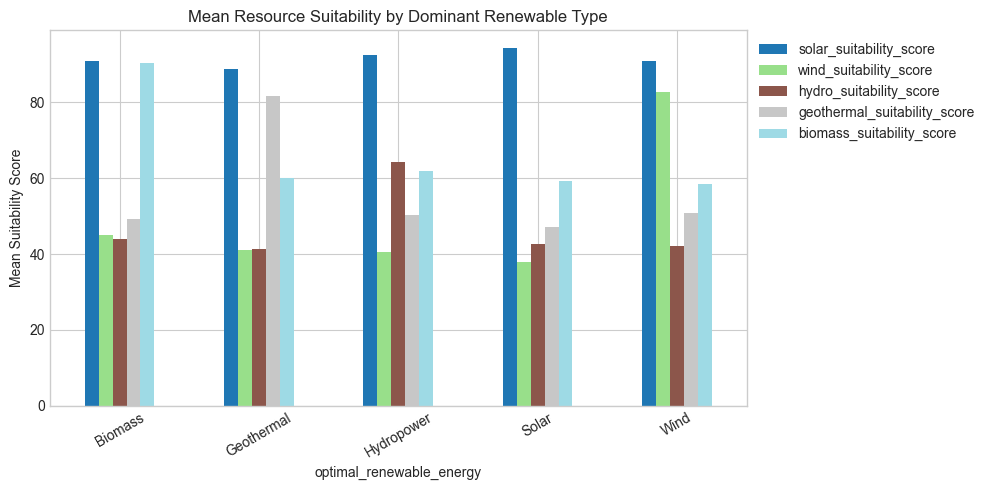

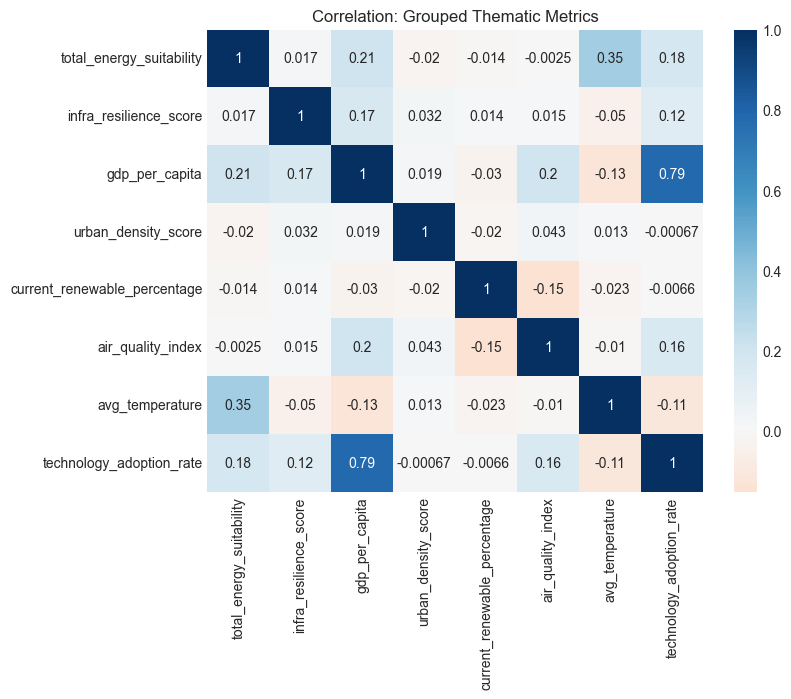

In [30]:
# --- Renewable Energy Mix Analysis ---

renewable_types = df["optimal_renewable_energy"].unique()
for typ in renewable_types:
    cnt = (df["optimal_renewable_energy"]==typ).sum()
    print(f"{typ:13}: {cnt} cities")

plt.figure(figsize=(8,4))
sns.countplot(x="optimal_renewable_energy", data=df, palette="tab20")
plt.title("Count: Optimal Renewable Energy Type per City")
plt.ylabel("Cities")
plt.xlabel("Main Renewable Type")
plt.show()

# --- Grouped Suitability Analysis ---
suit_cols = ["solar_suitability_score", "wind_suitability_score",
             "hydro_suitability_score", "geothermal_suitability_score", "biomass_suitability_score"]
suit_means = df.groupby("optimal_renewable_energy")[suit_cols].mean()
ax = suit_means.plot(kind='bar', colormap='tab20', figsize=(10,5))

plt.title("Mean Resource Suitability by Dominant Renewable Type")
plt.ylabel("Mean Suitability Score")
plt.xticks(rotation=30)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# --- Correlation Heatmap for Thematic Groups ---

grouped_corr_cols = [
    "total_energy_suitability", "infra_resilience_score", "gdp_per_capita",
    "urban_density_score", "current_renewable_percentage", "air_quality_index", "avg_temperature",
    "technology_adoption_rate"
]
plt.figure(figsize=(8,6))
sns.heatmap(df[grouped_corr_cols].corr(), annot=True, cmap="RdBu", center=0)
plt.title("Correlation: Grouped Thematic Metrics")
plt.show()





In [31]:
# By continent & by renewable
agg_summary = df.groupby(['continent', 'optimal_renewable_energy']).agg({
    'current_renewable_percentage':'mean',
    'infra_resilience_score':'mean',
    'urban_density_score':'mean',
    'gdp_per_capita':'mean',
    'air_quality_index':'mean'
}).round(1)
print("Mean values by Continent/Renewable Type:\n")
display(agg_summary.style.background_gradient(axis=0))


Mean values by Continent/Renewable Type:



In [32]:
# ---  Top Performers by Grouped Metrics ---
print("\nTop 3 Cities in Each Thematic Category:\n")
for col in grouped_corr_cols:
    print(f"- {col}:")
    display(df[['city','country',col]].sort_values(col, ascending=False).head(3))


Top 3 Cities in Each Thematic Category:

- total_energy_suitability:


,city,country,total_energy_suitability
966,Accra Greater,Ghana,93.56
270,Guayaquil Lower,Ecuador,92.13
1928,Caracas Old,Venezuela,91.86


- infra_resilience_score:


,city,country,infra_resilience_score
1404,Helsinki Central,Finland,"4,074.32"
1306,Helsinki Greater,Finland,"2,944.31"
1608,New York Old,USA,"2,471.96"


- gdp_per_capita:


,city,country,gdp_per_capita
1274,Tokyo District 3,Japan,120000
532,Chicago District 1,USA,120000
1368,Auckland Old,New Zealand,120000


- urban_density_score:


,city,country,urban_density_score
1470,Tokyo Lower,Japan,7.79
1317,Houston Region B,USA,7.44
458,Caracas Zone 1,Venezuela,7.43


- current_renewable_percentage:


,city,country,current_renewable_percentage
1921,Denver South,USA,75.00
834,Vancouver District 3,Canada,75.00
288,Brisbane Old,Australia,75.00


- air_quality_index:


,city,country,air_quality_index
662,Guayaquil East,Ecuador,166
352,San Francisco District 1,USA,158
1326,Mexico City Greater,Mexico,158


- avg_temperature:


,city,country,avg_temperature
74,Guayaquil,Ecuador,30.50
364,Quito Central,Ecuador,30.09
411,Kuala Lumpur Port,Malaysia,29.78


- technology_adoption_rate:


,city,country,technology_adoption_rate
330,Athens Lower,Greece,10.00
1422,Vancouver East,Canada,10.00
1861,Canberra South,Australia,10.00


In [12]:
# Energy Infrastructure Analysis
print("\nENERGY INFRASTRUCTURE ANALYSIS")
print("="*50)

# Grid infrastructure quality
grid_quality_stats = df.groupby('continent')['grid_infrastructure_quality'].agg(['mean', 'std']).round(2)
print("Grid Infrastructure Quality by Continent:")
print(grid_quality_stats)

# Energy consumption patterns
consumption_stats = df.groupby('continent')['electricity_consumption_per_capita'].agg(['mean', 'median']).round(2)
print("\nElectricity Consumption per Capita by Continent:")
print(consumption_stats)

# Investment analysis
investment_by_continent = df.groupby('continent')['renewable_investment'].sum().sort_values(ascending=False)
print("\nTotal Renewable Investment by Continent:")
print(investment_by_continent)


ENERGY INFRASTRUCTURE ANALYSIS
Grid Infrastructure Quality by Continent:
               mean   std
continent                
Africa         5.04  1.25
Asia           5.46  1.53
Europe         5.78  1.71
North America  5.76  1.59
Oceania        5.80  1.63
South America  5.35  1.41

Electricity Consumption per Capita by Continent:
               mean  median
continent                  
Africa         4.68     4.0
Asia           5.27     5.0
Europe         5.88     5.0
North America  5.78     5.0
Oceania        5.77     5.0
South America  5.11     5.0

Total Renewable Investment by Continent:
continent
Europe           285285
Asia             272619
North America    269503
South America    160426
Africa           152773
Oceania          115225
Name: renewable_investment, dtype: int64


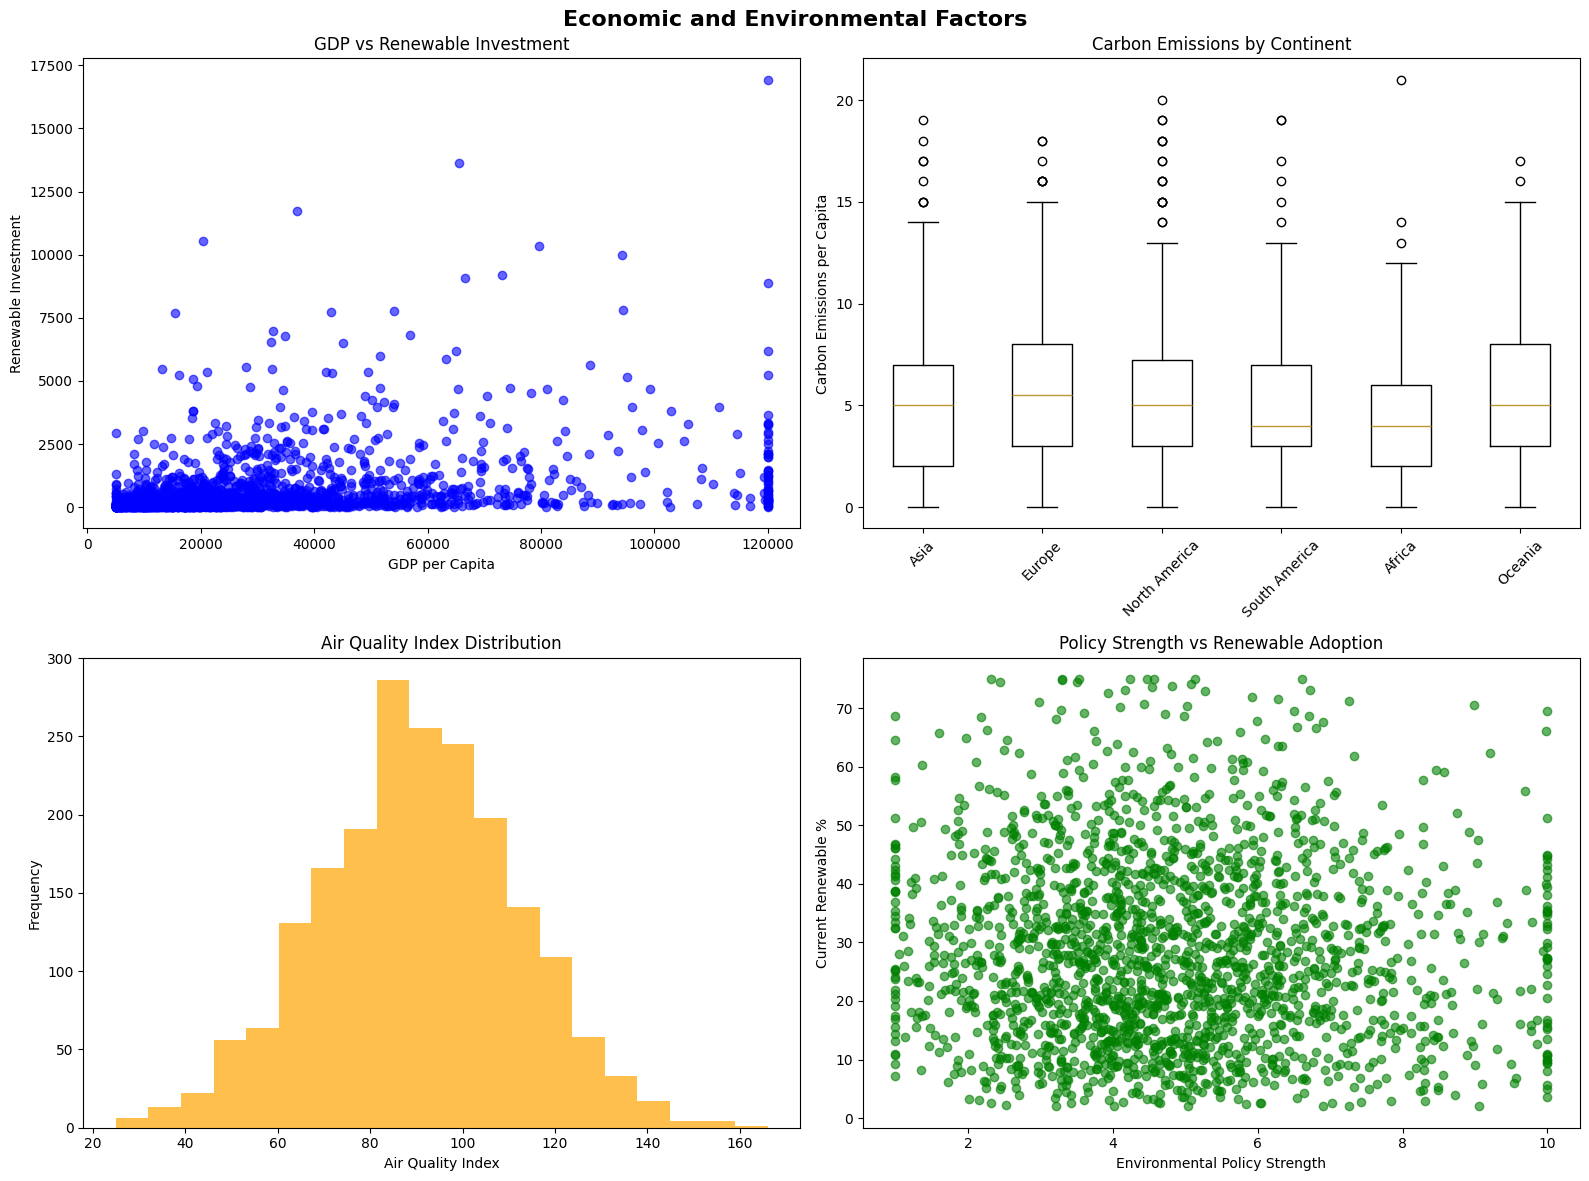

In [ ]:
# Economic and Environmental Factors
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Economic and Environmental Factors', fontsize=16, fontweight='bold')

# 1. GDP vs Renewable Investment
axes[0,0].scatter(df['gdp_per_capita'], df['renewable_investment'], alpha=0.6, c='blue')
axes[0,0].set_xlabel('GDP per Capita')
axes[0,0].set_ylabel('Renewable Investment')
axes[0,0].set_title('GDP vs Renewable Investment')

# 2. Carbon Emissions Distribution
axes[0,1].boxplot([df[df['continent'] == cont]['carbon_emissions_per_capita'].dropna()
                   for cont in df['continent'].unique()])
axes[0,1].set_xticklabels(df['continent'].unique(), rotation=45)
axes[0,1].set_ylabel('Carbon Emissions per Capita')
axes[0,1].set_title('Carbon Emissions by Continent')

# 3. Air Quality Index
axes[1,0].hist(df['air_quality_index'], bins=20, alpha=0.7, color='orange')
axes[1,0].set_xlabel('Air Quality Index')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Air Quality Index Distribution')

# 4. Environmental Policy Strength vs Renewable %
axes[1,1].scatter(df['environmental_policy_strength'], df['current_renewable_percentage'],
                  alpha=0.6, c='green')
axes[1,1].set_xlabel('Environmental Policy Strength')
axes[1,1].set_ylabel('Current Renewable %')
axes[1,1].set_title('Policy Strength vs Renewable Adoption')

plt.tight_layout()
plt.show()


CLIMATE PATTERNS ANALYSIS
Climate Variables Summary:
       avg_temperature  annual_rainfall  avg_humidity  cloud_cover_percentage
count          2000.00          2000.00       2000.00                 2000.00
mean             10.05          1214.90         71.58                   34.40
std               8.23           464.70         10.91                   10.53
min              -5.00           200.00         35.00                   15.00
25%               3.83           881.50         63.94                   27.10
50%               9.17          1169.87         71.62                   34.16
75%              16.44          1525.13         79.46                   41.50
max              30.50          2698.90         95.00                   69.29


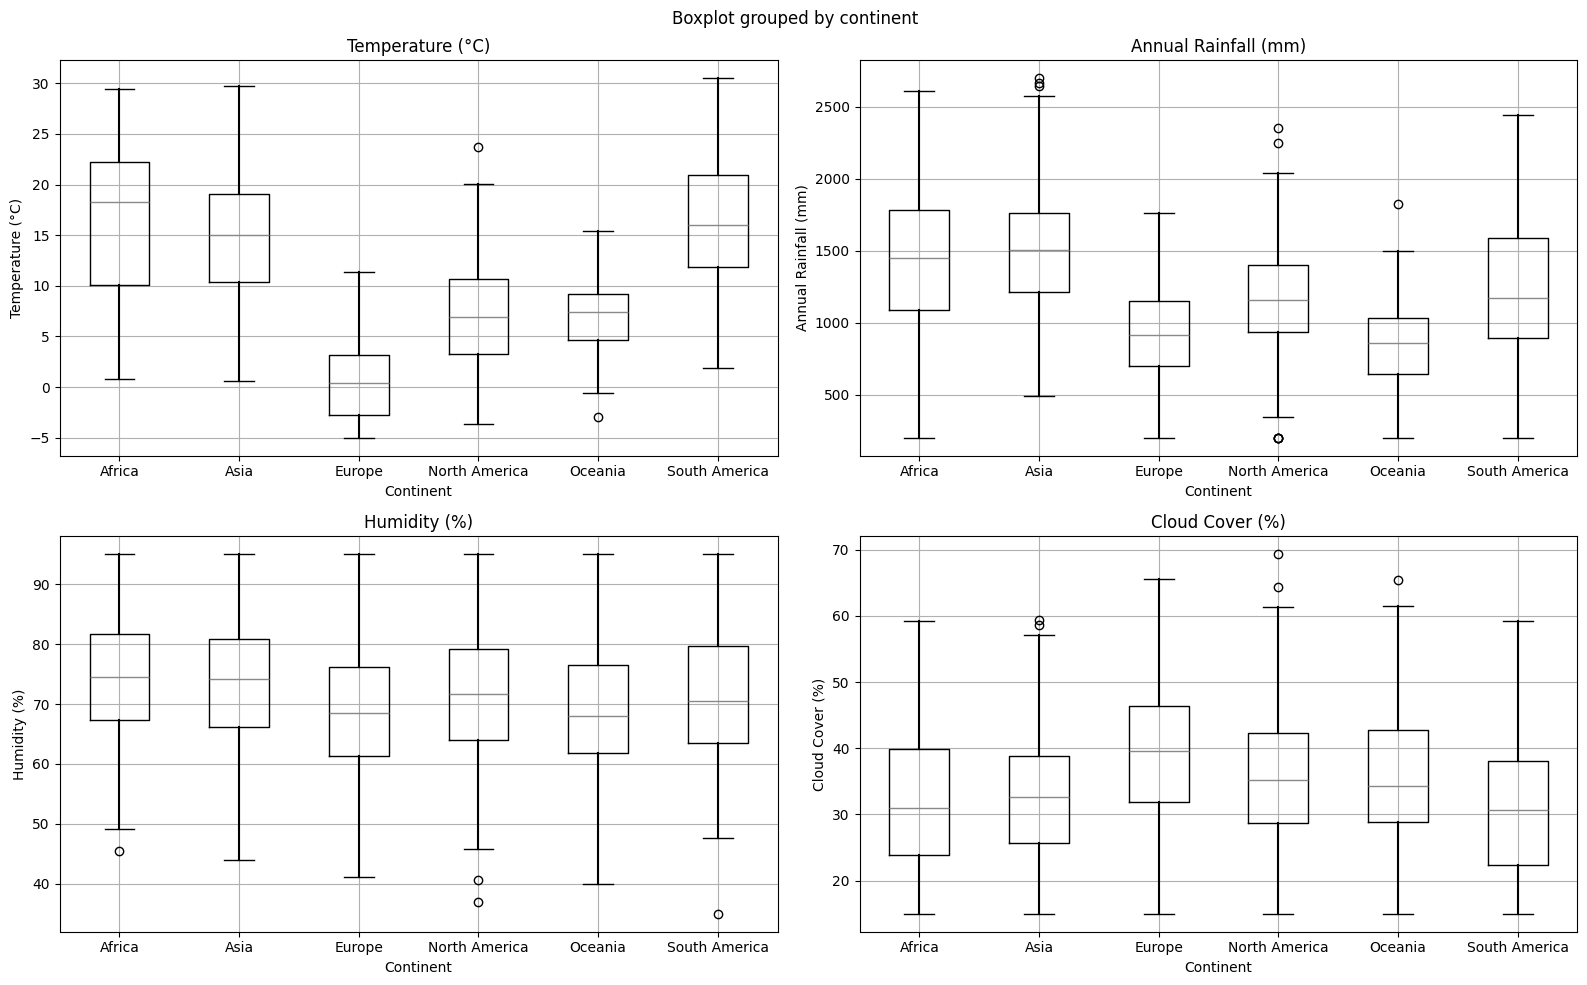

In [17]:
# Climate Patterns Analysis
print("\nCLIMATE PATTERNS ANALYSIS")

climate_vars = ['avg_temperature', 'annual_rainfall', 'avg_humidity', 'cloud_cover_percentage']
climate_stats = df[climate_vars].describe().round(2)
print("Climate Variables Summary:")
print(climate_stats)

# Climate patterns by continent
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Climate Patterns by Continent', fontsize=16, fontweight='bold')

climate_plots = [
    ('avg_temperature', 'Temperature (°C)'),
    ('annual_rainfall', 'Annual Rainfall (mm)'),
    ('avg_humidity', 'Humidity (%)'),
    ('cloud_cover_percentage', 'Cloud Cover (%)')
]

for i, (var, label) in enumerate(climate_plots):
    row, col = i // 2, i % 2
    df.boxplot(column=var, by='continent', ax=axes[row, col], boxprops=dict(color='black', ), whiskerprops=dict(color='black', linewidth=1.5))
    axes[row, col].set_title(label)
    axes[row, col].set_xlabel('Continent')
    axes[row, col].set_ylabel(label)

plt.tight_layout()
plt.show()

In [19]:
# Technology and Infrastructure Assessment
print("\nTECHNOLOGY & INFRASTRUCTURE ASSESSMENT")
print("="*50)

tech_vars = ['technology_adoption_rate', 'skilled_workforce_percentage',
            'grid_infrastructure_quality', 'transmission_infrastructure']

tech_stats = df[tech_vars].describe().round(2)
print("Technology Infrastructure Summary:")
print(tech_stats)

# Technology readiness by optimal renewable energy
tech_analysis = df.groupby('optimal_renewable_energy')[tech_vars].mean().round(2)
print("\nTechnology Metrics by Optimal Renewable Energy:")
print(tech_analysis)


TECHNOLOGY & INFRASTRUCTURE ASSESSMENT
Technology Infrastructure Summary:
       technology_adoption_rate  skilled_workforce_percentage  grid_infrastructure_quality  transmission_infrastructure
count                   2000.00                       2000.00                      2000.00                      2000.00
mean                       4.53                         45.65                         5.53                         5.52
std                        1.61                          9.84                         1.56                         1.64
min                        1.00                         16.65                         2.00                         2.00
25%                        3.43                         38.91                         4.46                         4.37
50%                        4.31                         45.68                         5.35                         5.31
75%                        5.38                         52.19                        

In [20]:
# Advanced Analytics - Renewable Energy Optimization
print("\nRENEWABLE ENERGY OPTIMIZATION INSIGHTS")
print("="*50)

# Cities with highest renewable potential
renewable_potential = df.copy()
renewable_potential['avg_suitability'] = renewable_potential[suitability_cols].mean(axis=1)

top_potential = renewable_potential.nlargest(10, 'avg_suitability')[
    ['city', 'country', 'optimal_renewable_energy', 'avg_suitability', 'current_renewable_percentage']
]
print("Top 10 Cities with Highest Renewable Potential:")
print(top_potential.round(2))

# Gap analysis: Potential vs Current adoption
renewable_potential['potential_gap'] = (
    renewable_potential['renewable_target_2030'] - renewable_potential['current_renewable_percentage']
)

biggest_gaps = renewable_potential.nlargest(10, 'potential_gap')[
    ['city', 'country', 'current_renewable_percentage', 'renewable_target_2030', 'potential_gap']
]
print("\nCities with Biggest Renewable Energy Gaps:")
print(biggest_gaps.round(2))

# Investment efficiency analysis
renewable_potential['investment_efficiency'] = (
    renewable_potential['current_renewable_percentage'] /
    (renewable_potential['renewable_investment'] + 1)  # +1 to avoid division by zero
)

efficient_investments = renewable_potential.nlargest(10, 'investment_efficiency')[
    ['city', 'country', 'renewable_investment', 'current_renewable_percentage', 'investment_efficiency']
]
print("\nMost Investment-Efficient Cities:")
print(efficient_investments.round(2))


RENEWABLE ENERGY OPTIMIZATION INSIGHTS
Top 10 Cities with Highest Renewable Potential:
                    city    country optimal_renewable_energy  avg_suitability  current_renewable_percentage
966        Accra Greater      Ghana                  Biomass            93.56                         48.86
270      Guayaquil Lower    Ecuador                     Wind            92.13                         50.03
1928         Caracas Old  Venezuela               Hydropower            91.86                         23.10
1192  Chennai District 1      India                  Biomass            91.09                         39.01
1351       Kinshasa Port   DR Congo                     Wind            89.94                         61.73
1977    Kolkata Region B      India                     Wind            89.26                         46.15
1946       Accra Greater      Ghana                     Wind            88.83                         21.53
1060    Casablanca North    Morocco             